## Modelos de Classificação


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.read_csv('iris.csv', header=None)
#df = pd.read_csv('iris.data', header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]


In [5]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [6]:
# Separando as features (X) e a classe (y)
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]


In [7]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [8]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: species, Length: 150, dtype: object

In [9]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)


# Regressão Logística

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Criando e treinando o modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(X_test)

In [16]:
y_pred[:5]

array(['Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Virginica'],
      dtype=object)

In [17]:
y_test[:5]

139     Virginica
125     Virginica
67     Versicolor
3          Setosa
113     Virginica
Name: species, dtype: object

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)


Acurácia: 1.0
Precisão: 1.0
Revocação: 1.0
F1-Score: 1.0


# KNN

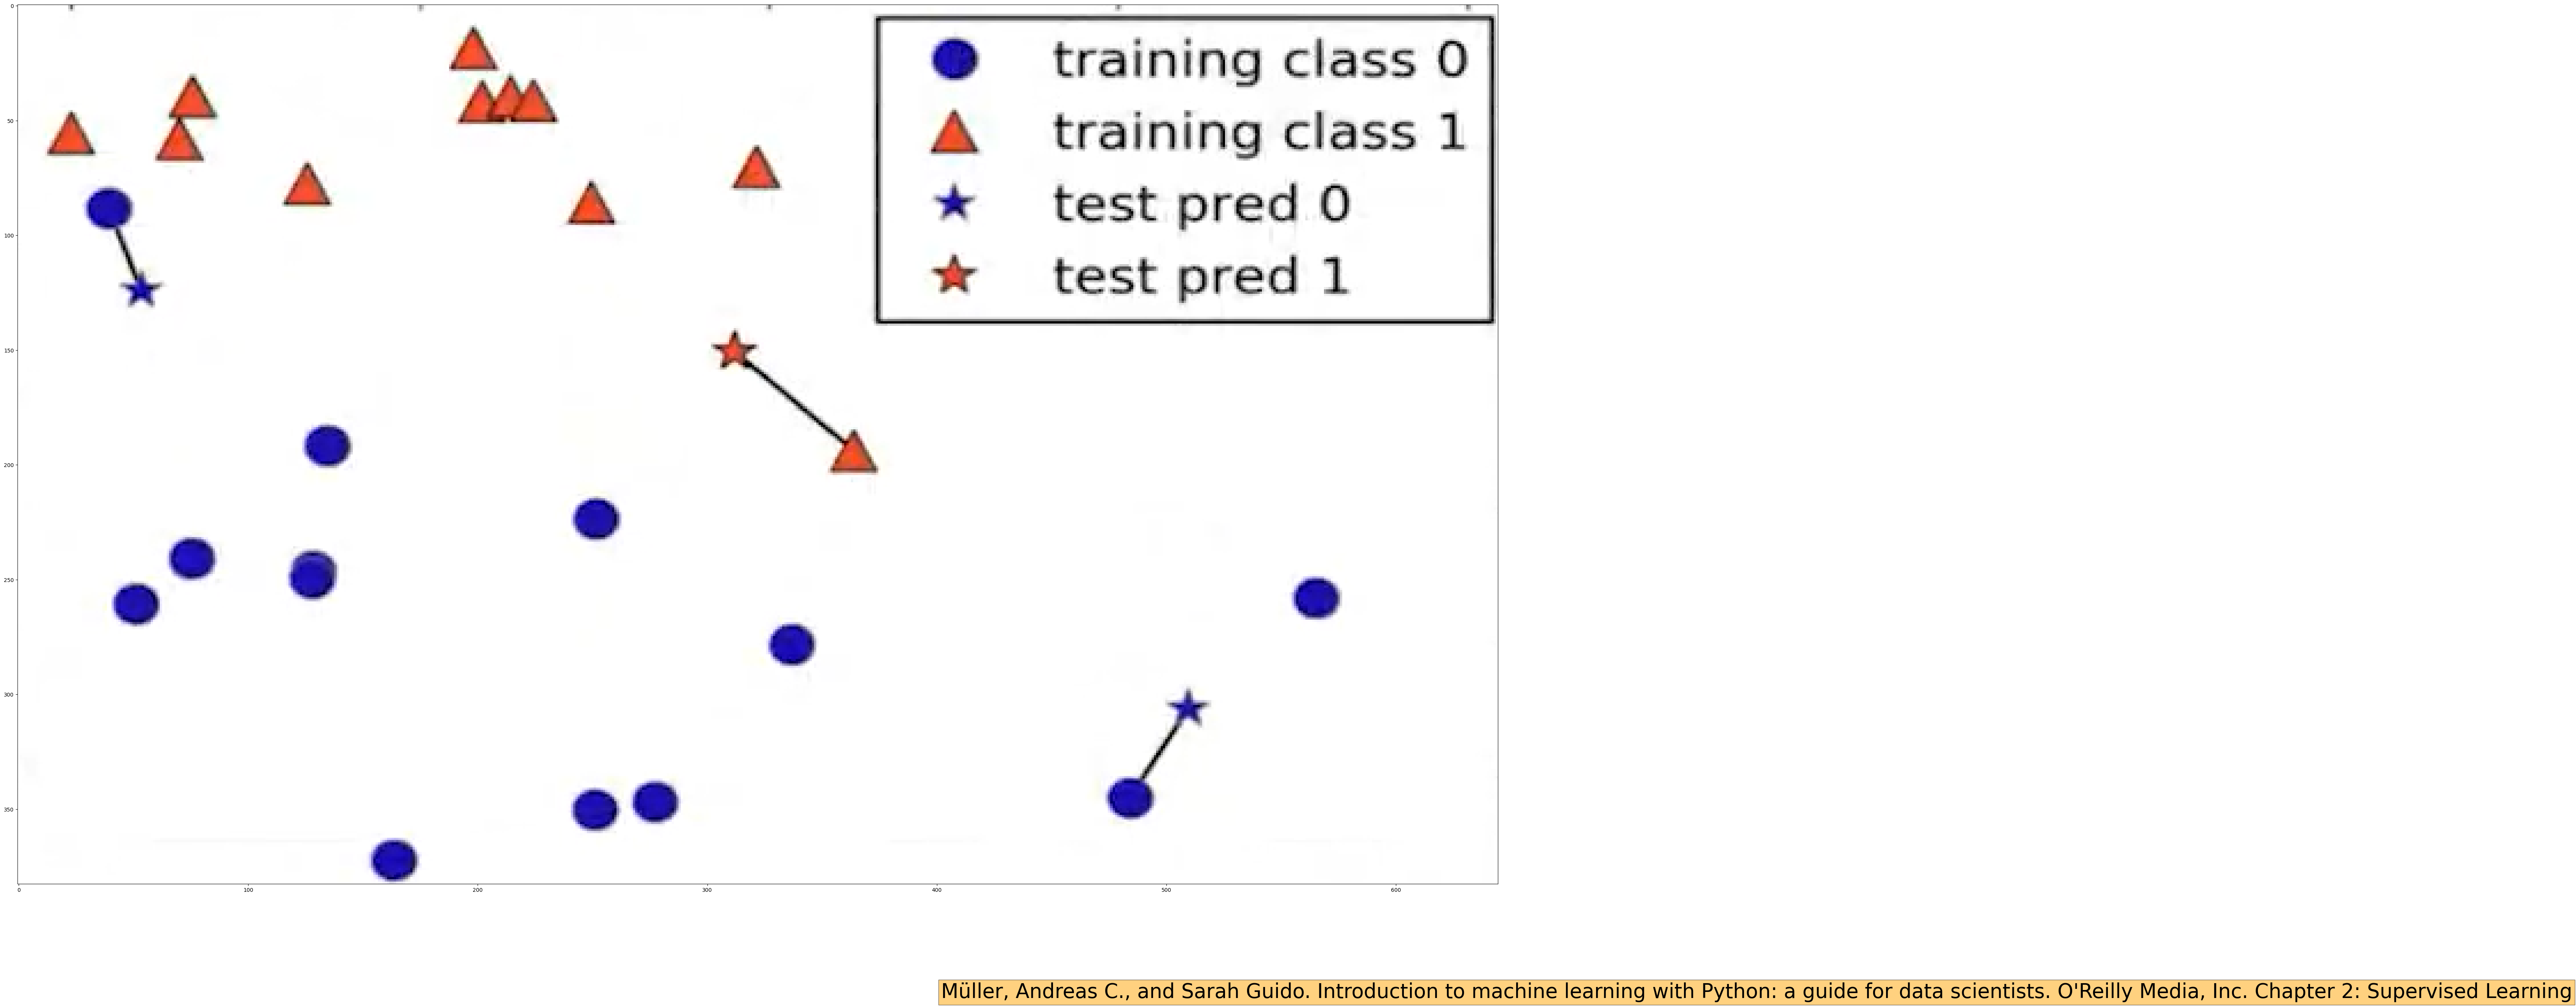

In [20]:
im = plt.imread('KNN.png')
plt.figure(figsize=(300, 30))
text = "Müller, Andreas C., and Sarah Guido. Introduction to machine learning with Python: a guide for data scientists. O'Reilly Media, Inc. Chapter 2: Supervised Learning"
plt.figtext(0.6, 0.01, text, ha="center", fontsize=38, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.imshow(im)


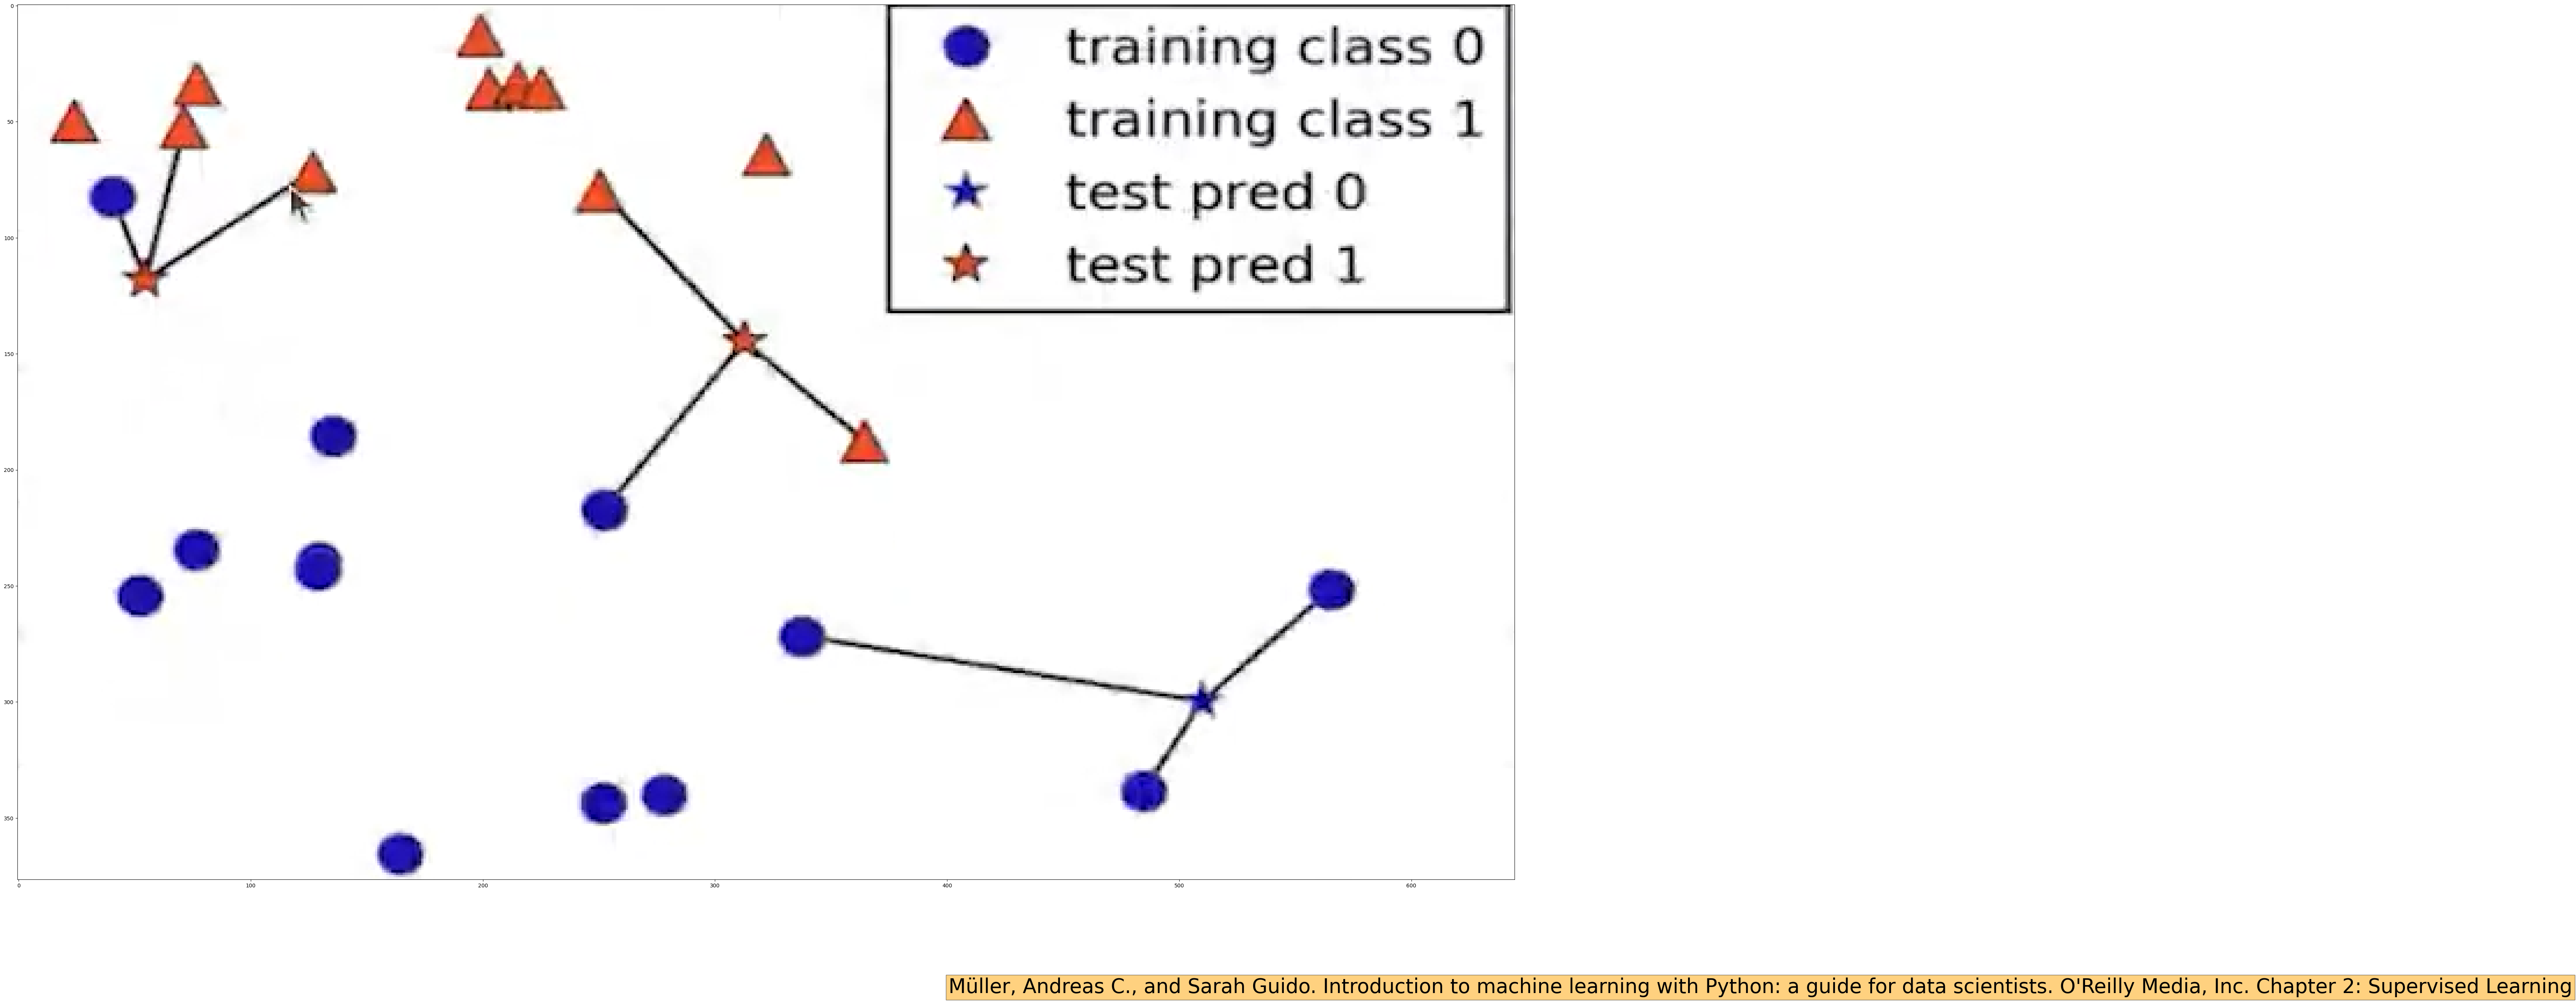

In [21]:
im = plt.imread('KNN_2.png')
plt.figure(figsize=(300, 30))
text = "Müller, Andreas C., and Sarah Guido. Introduction to machine learning with Python: a guide for data scientists. O'Reilly Media, Inc. Chapter 2: Supervised Learning"
plt.figtext(0.6, 0.01, text, ha="center", fontsize=38, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.imshow(im)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando o modelo KNN com K=1 vizinhos
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [23]:
# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(X_test)

In [24]:
y_pred

array(['Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor'], dtype=object)

In [25]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")


Acurácia: 0.9777777777777777


In [26]:
# Relação da acurácia com a quantidade de vizinhos
number_neighbors = range(1, 106)
accuracy_dict = dict()

for i in number_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy_dict[i] = accuracy_score(y_test, y_pred)


In [27]:
accuracy_dict

{1: 0.9777777777777777,
 2: 0.9777777777777777,
 3: 0.9777777777777777,
 4: 0.9777777777777777,
 5: 1.0,
 6: 0.9777777777777777,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 0.9777777777777777,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 0.9777777777777777,
 22: 0.9555555555555556,
 23: 0.9777777777777777,
 24: 0.9555555555555556,
 25: 0.9555555555555556,
 26: 0.9777777777777777,
 27: 0.9777777777777777,
 28: 0.9777777777777777,
 29: 0.9777777777777777,
 30: 0.9777777777777777,
 31: 0.9555555555555556,
 32: 0.9555555555555556,
 33: 0.9555555555555556,
 34: 0.9555555555555556,
 35: 0.9555555555555556,
 36: 0.9555555555555556,
 37: 0.9777777777777777,
 38: 0.9555555555555556,
 39: 0.9555555555555556,
 40: 0.9555555555555556,
 41: 0.9555555555555556,
 42: 0.9555555555555556,
 43: 0.9555555555555556,
 44: 0.9333333333333333,
 45: 0.9333333333333333,
 46: 0.9333333333333333,
 47: 0.9333333333333333,
 48: 0.9333333333333333,
 49: 0.933333333333

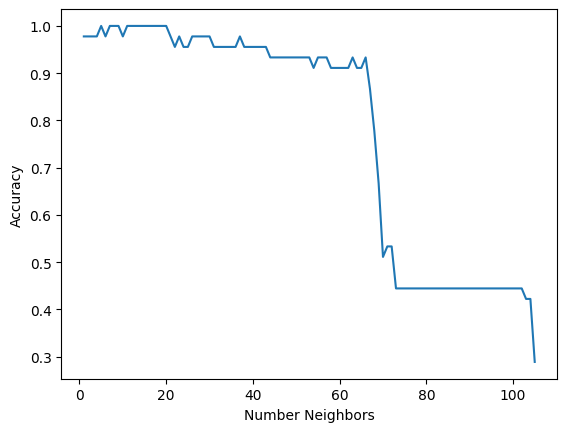

In [28]:
plt.plot(number_neighbors, accuracy_dict.values())
plt.xlabel("Number Neighbors")
plt.ylabel("Accuracy")
plt.show()


# Árvore de Decisão


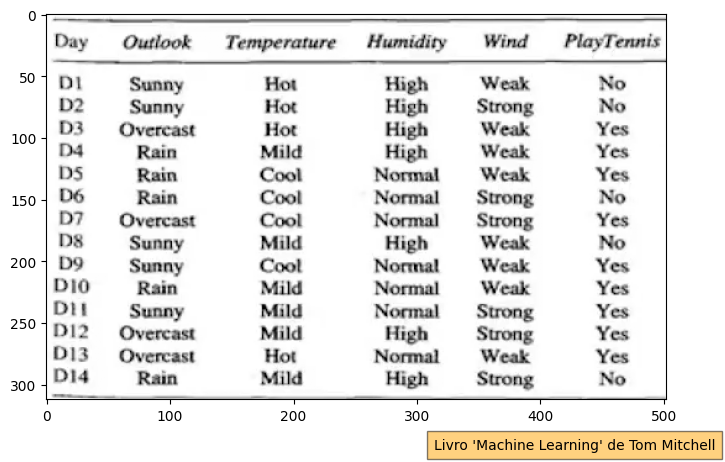

In [29]:
im = plt.imread('tenis.png')
plt.figure(figsize=(25, 5))
text = "Livro 'Machine Learning' de Tom Mitchell"
plt.figtext(0.6, 0.01, text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.imshow(im)


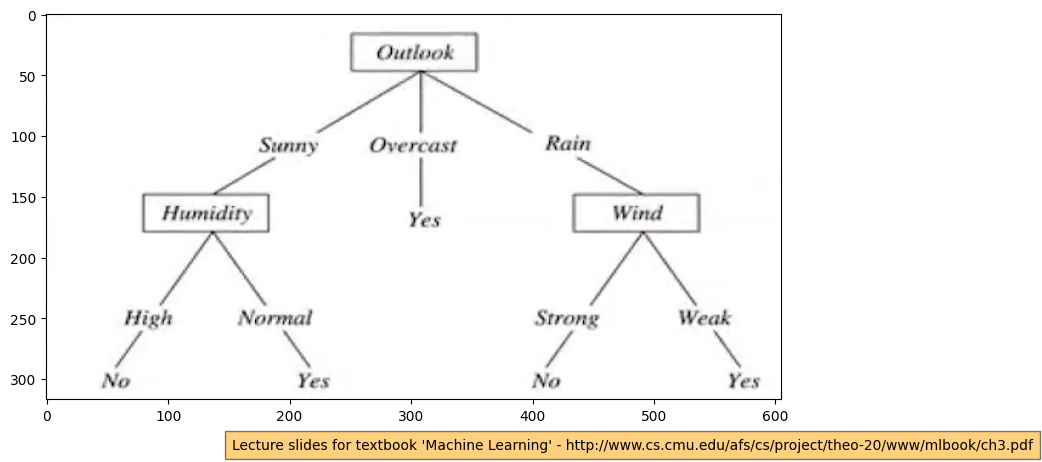

In [30]:
im = plt.imread('arvore.png')
plt.figure(figsize=(25, 5))
text = "Lecture slides for textbook 'Machine Learning' - http://www.cs.cmu.edu/afs/cs/project/theo-20/www/mlbook/ch3.pdf"
plt.figtext(0.6, 0.01, text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.imshow(im)


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Criando e treinando o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(X_test)

In [34]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 1.0


[Text(0.5416666666666666, 0.9285714285714286, 'petal_width <= 0.8\n105\n[32, 36, 37]\nversicolor'),
 Text(0.4583333333333333, 0.7857142857142857, '32\n[32, 0, 0]\nsetosa'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'petal_width <= 1.75\n73\n[0, 36, 37]\nversicolor'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'petal_length <= 5.35\n39\n[0, 35, 4]\nvirginica'),
 Text(0.3333333333333333, 0.5, 'sepal_length <= 4.95\n37\n[0, 35, 2]\nvirginica'),
 Text(0.16666666666666666, 0.35714285714285715, 'petal_width <= 1.35\n2\n[0, 1, 1]\nvirginica'),
 Text(0.08333333333333333, 0.21428571428571427, '1\n[0, 1, 0]\nvirginica'),
 Text(0.25, 0.21428571428571427, '1\n[0, 0, 1]\nversicolor'),
 Text(0.5, 0.35714285714285715, 'petal_length <= 4.95\n35\n[0, 34, 1]\nvirginica'),
 Text(0.4166666666666667, 0.21428571428571427, '32\n[0, 32, 0]\nvirginica'),
 Text(0.5833333333333334, 0.21428571428571427, 'petal_width <= 1

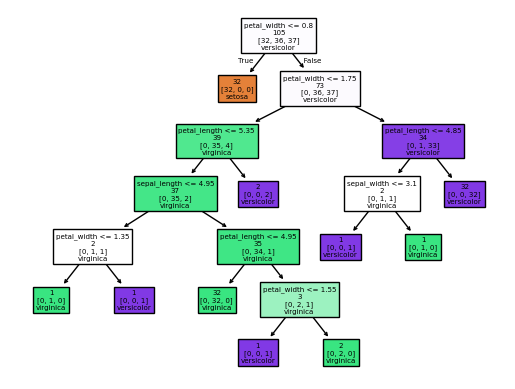

In [35]:
from sklearn import tree

tree.plot_tree(modelo, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
               class_names=['setosa', 'virginica', 'versicolor'],
               impurity=False, label='none', filled=True)


# Suport Vector Machines (SVM)

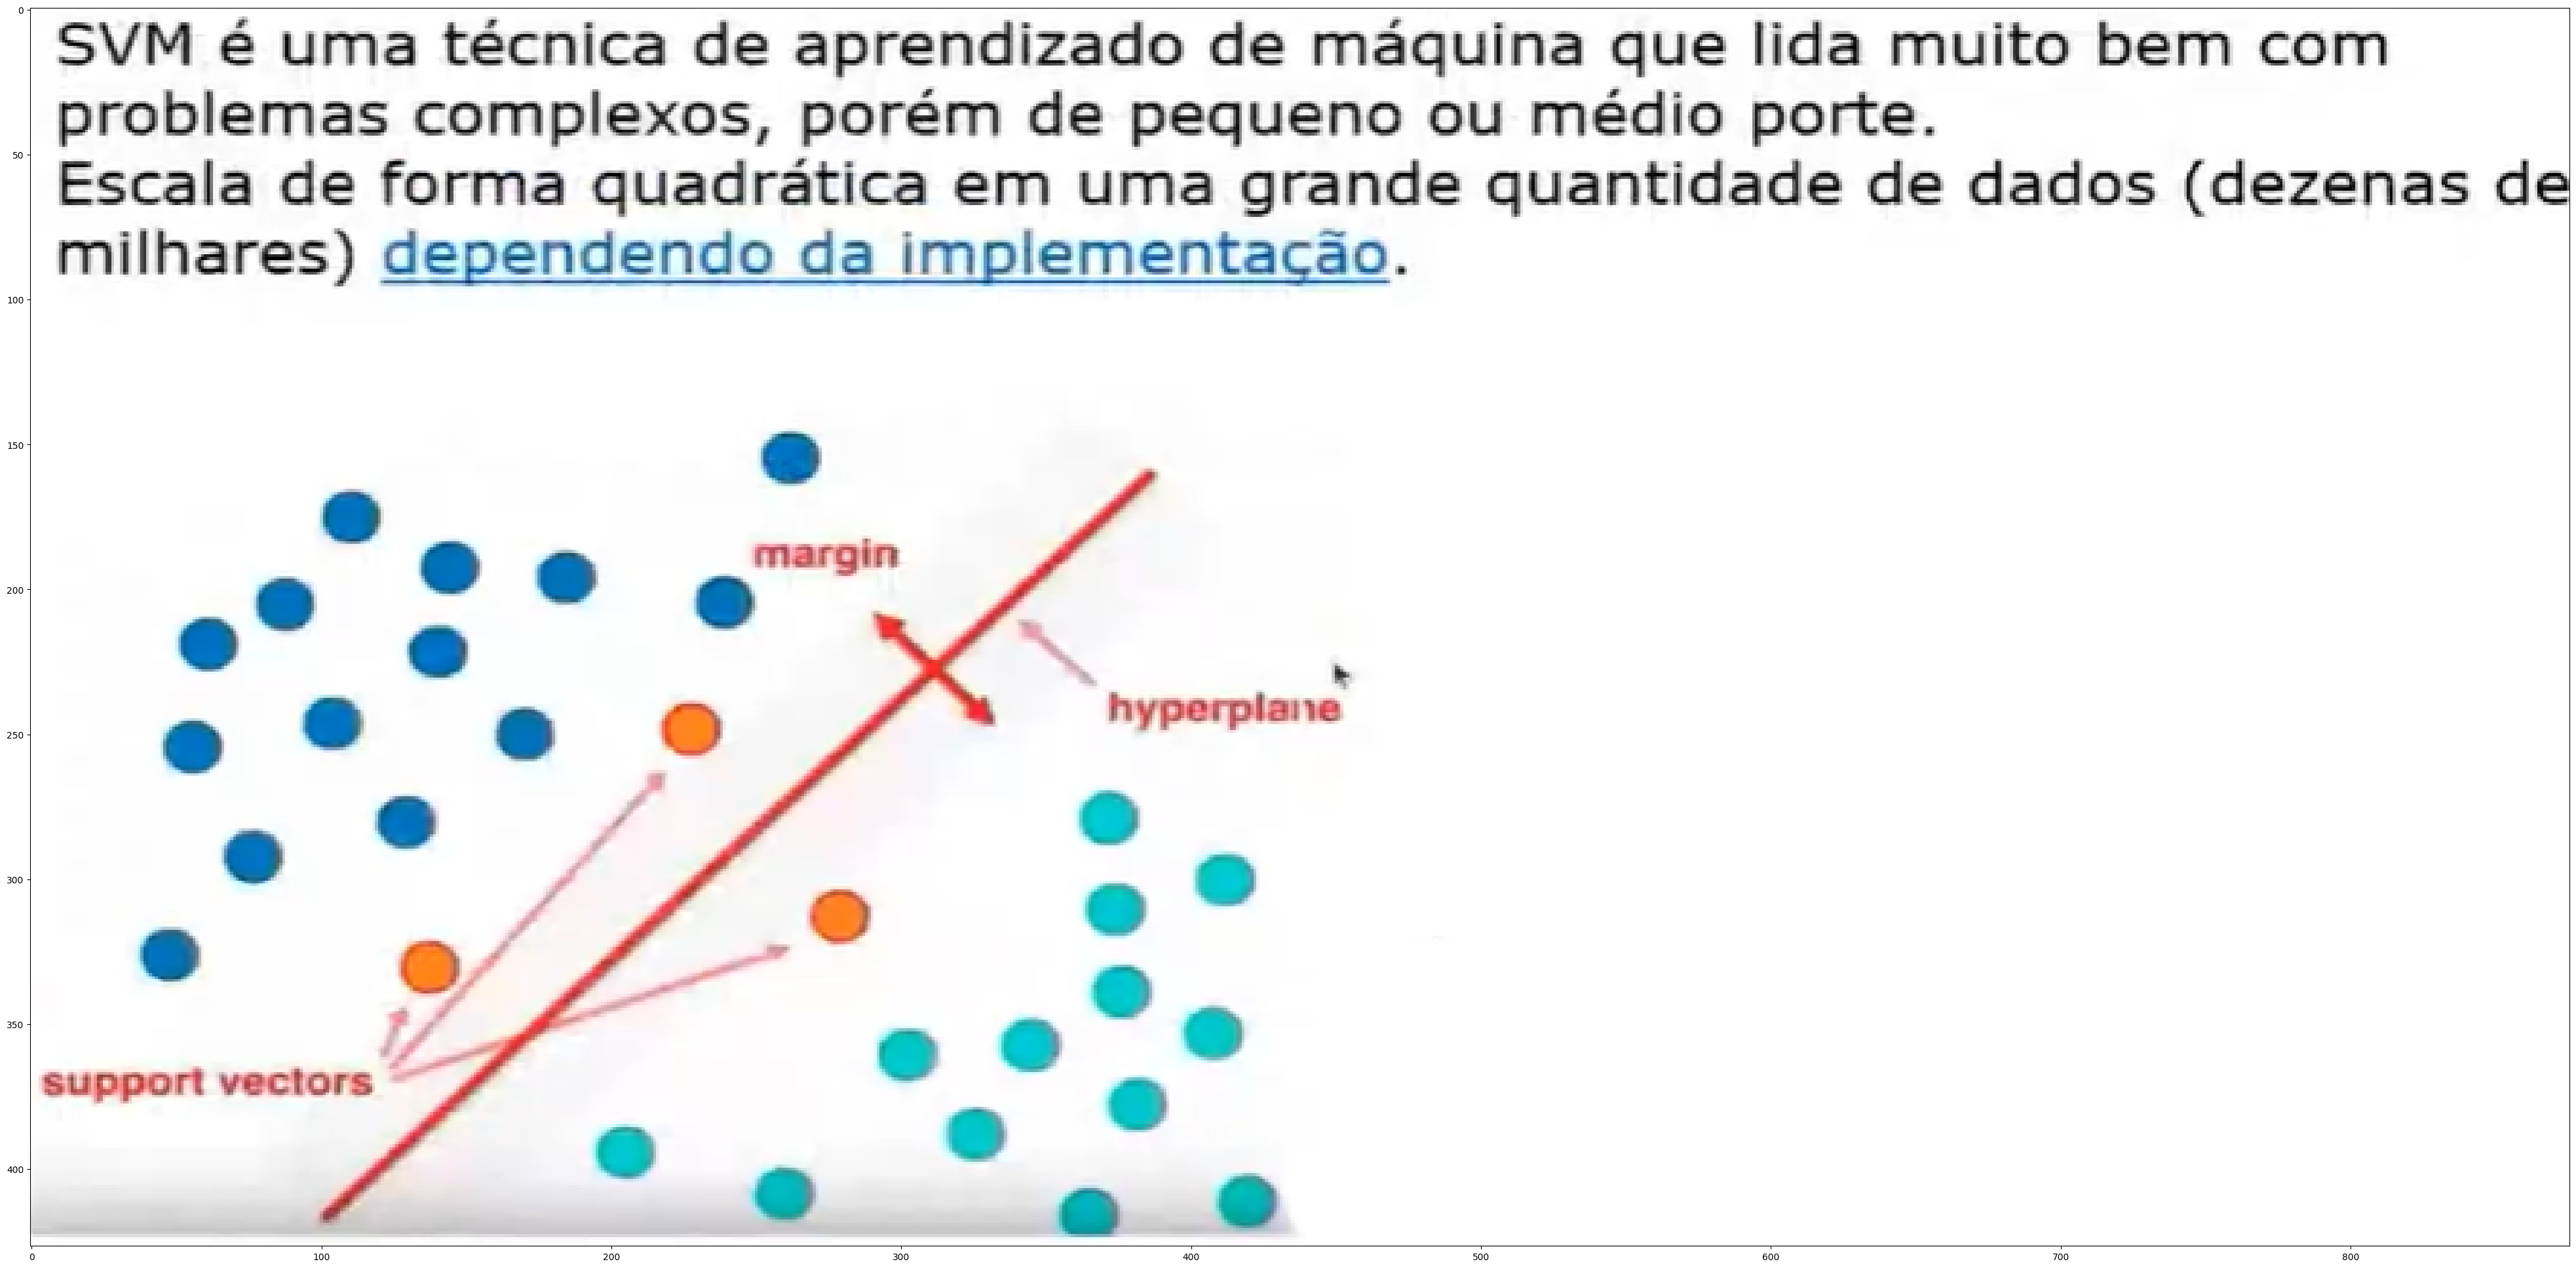

In [36]:
# https://web.microsoftstream.com/video/78d4414d-715d-459b-a02e-d0c149112cb
im = plt.imread('svm.png')
plt.figure(figsize=(50, 50))
plt.imshow(im)
plt.show()


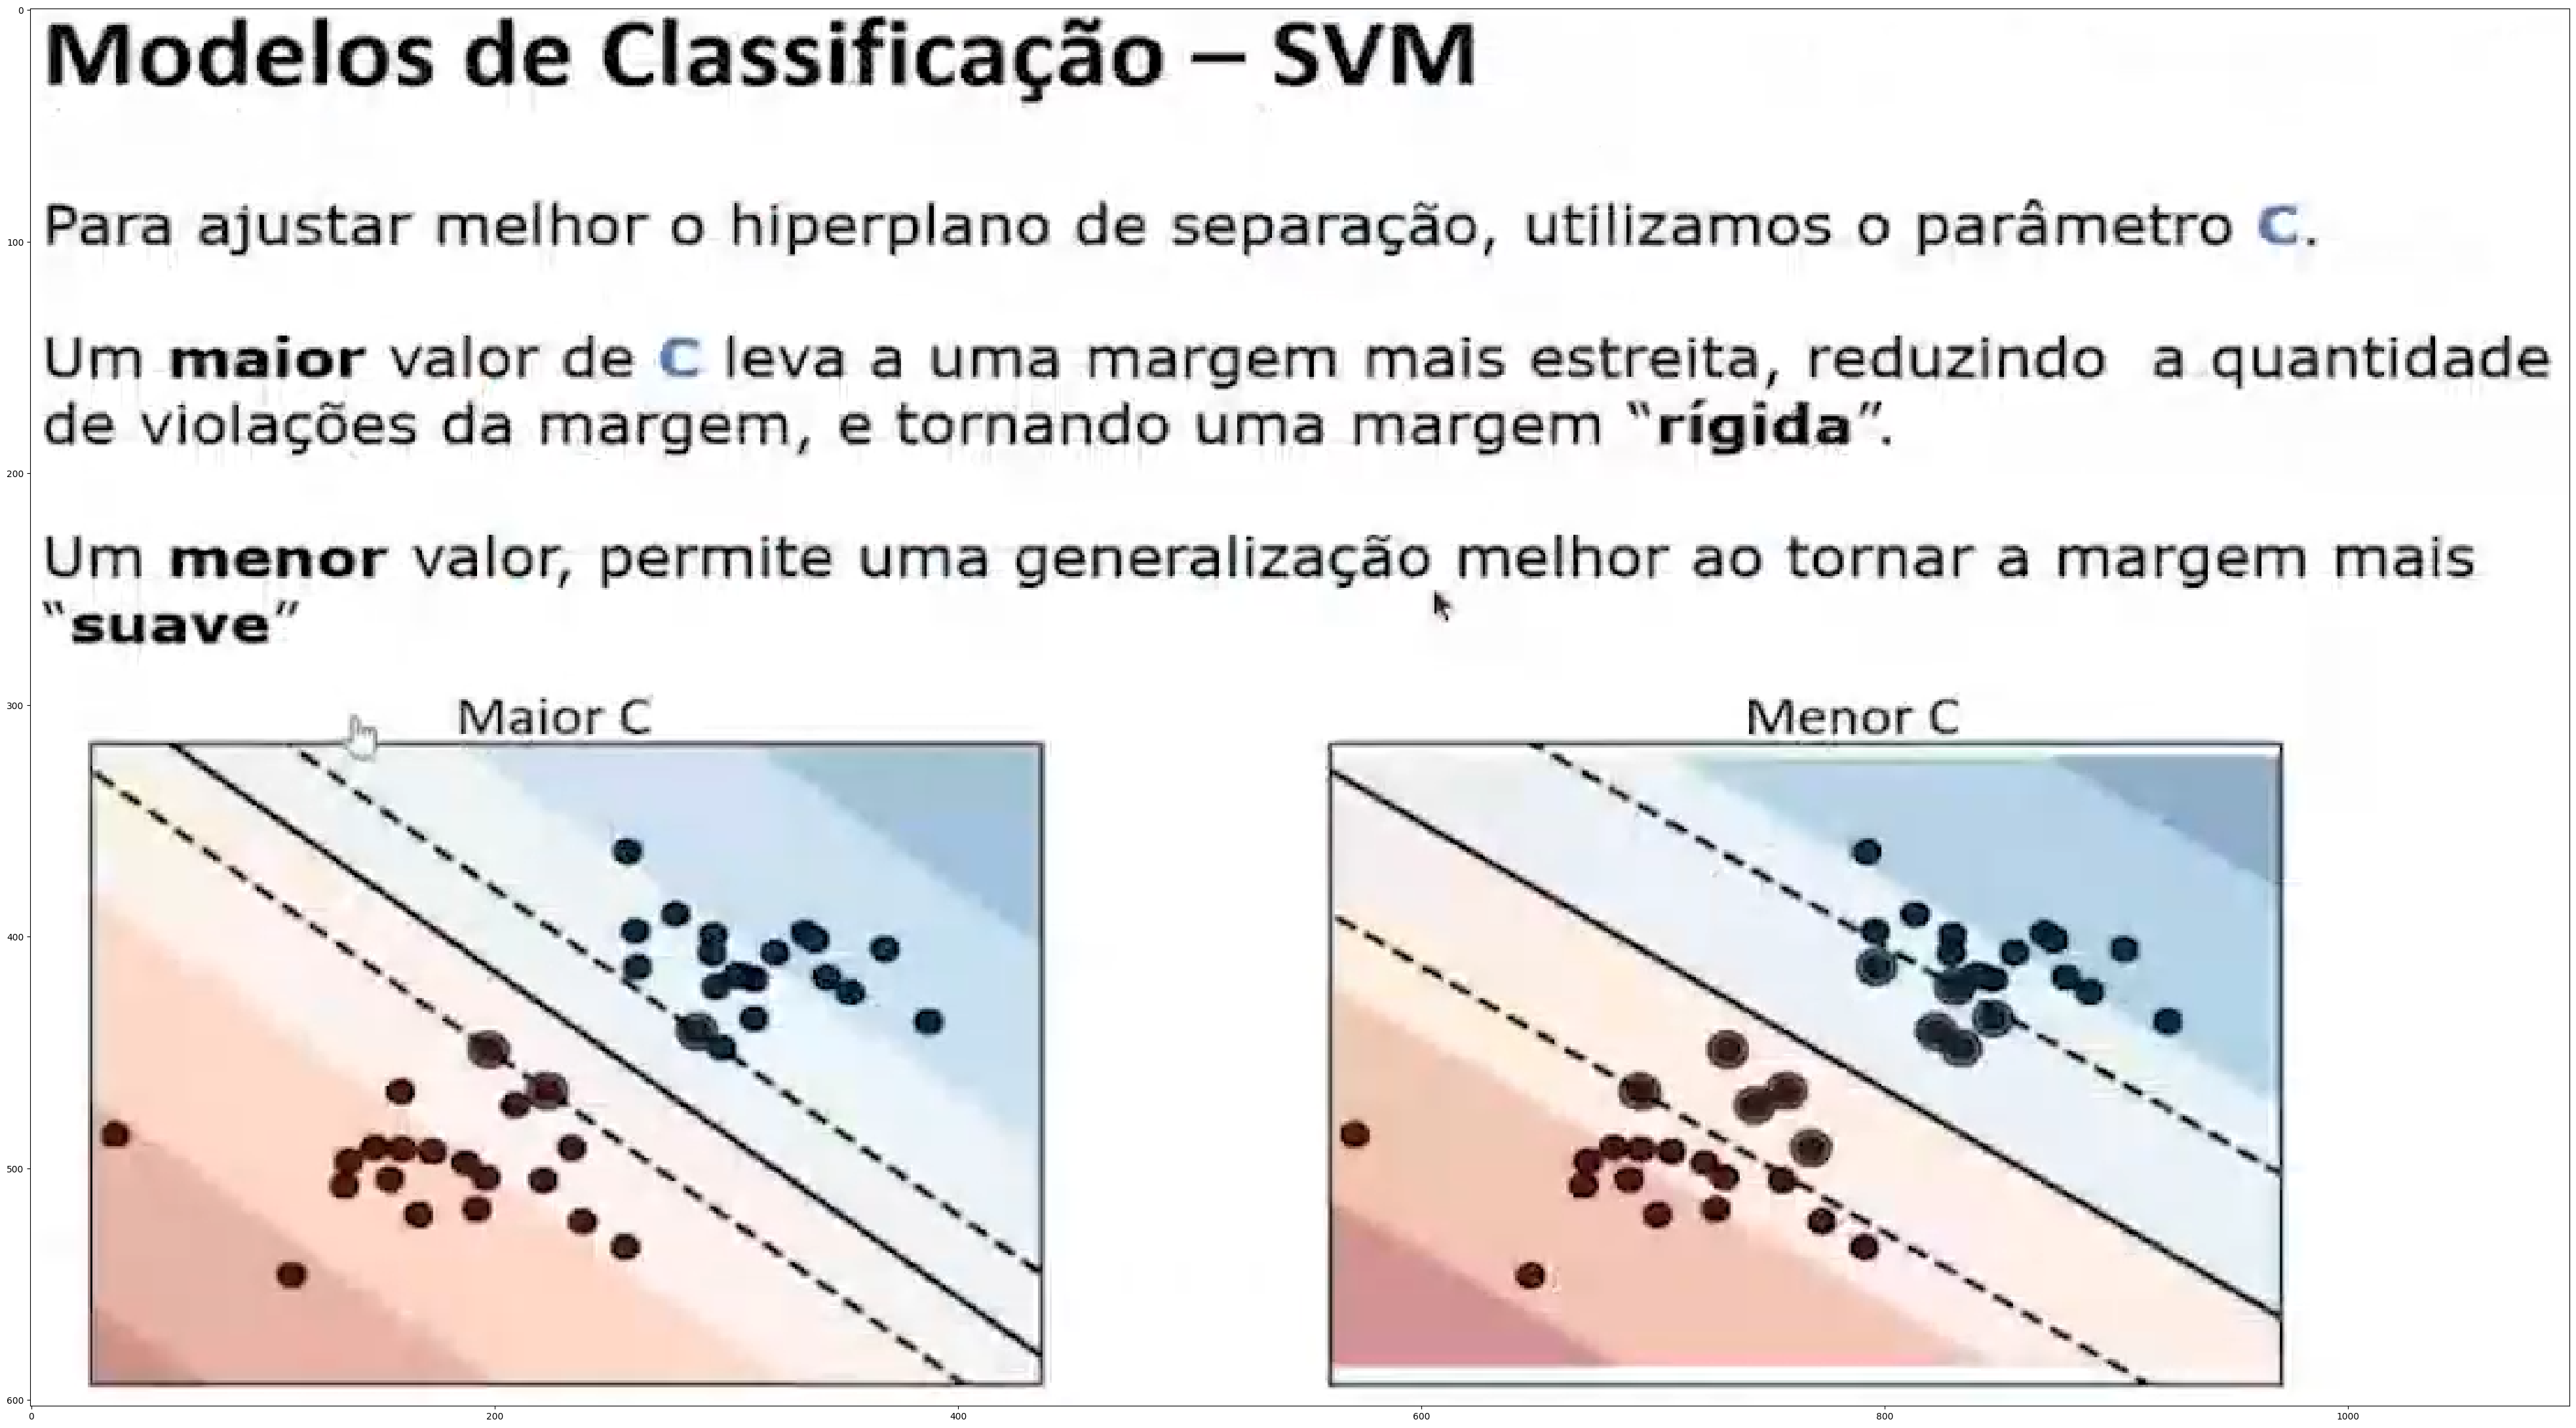

In [38]:
im = plt.imread('svm2.png')
plt.figure(figsize=(50, 50))
plt.imshow(im)
plt.show()

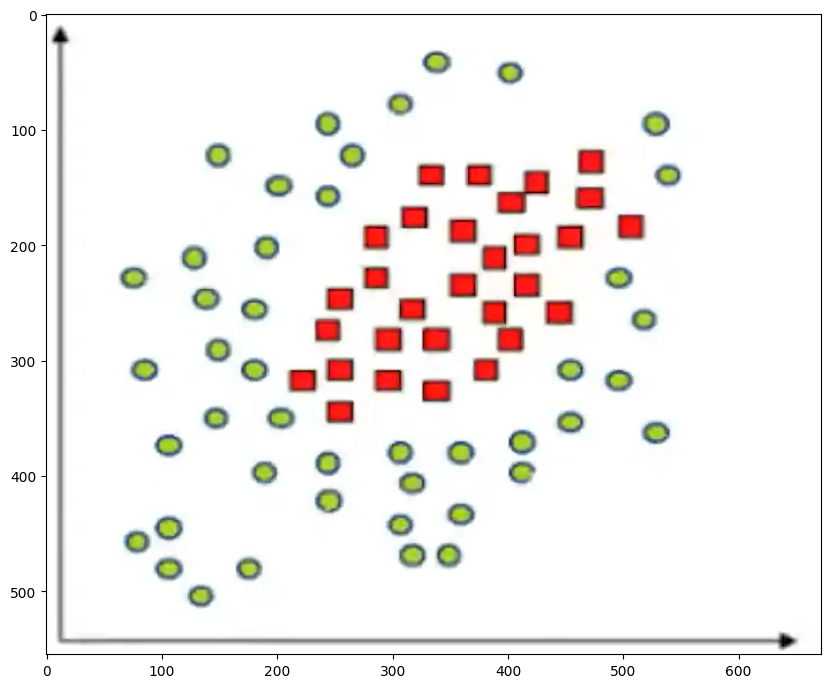

In [39]:
# http://simi.ifn.pt/slumrte-o-maquinas-de-vetores-o-truque-kernel-17408INLU555Jia
im = plt.imread('svm3.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


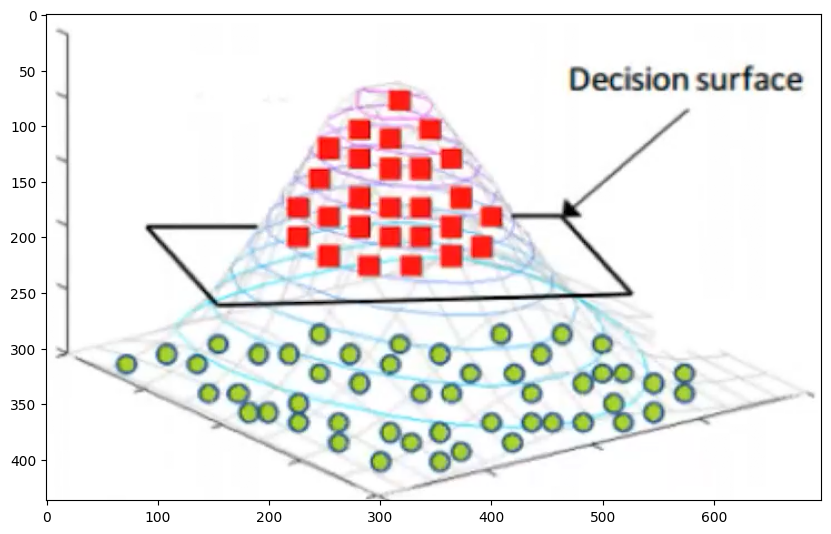

In [40]:
# http://simi.ifn.pt/slumrte-o-maquinas-de-vetores-o-truque-do-kernel-17408INLU555Jia
im = plt.imread('svm4.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


#### Link do vídeo >>> https://www.youtube.com/watch?v=OdlNM96sHio

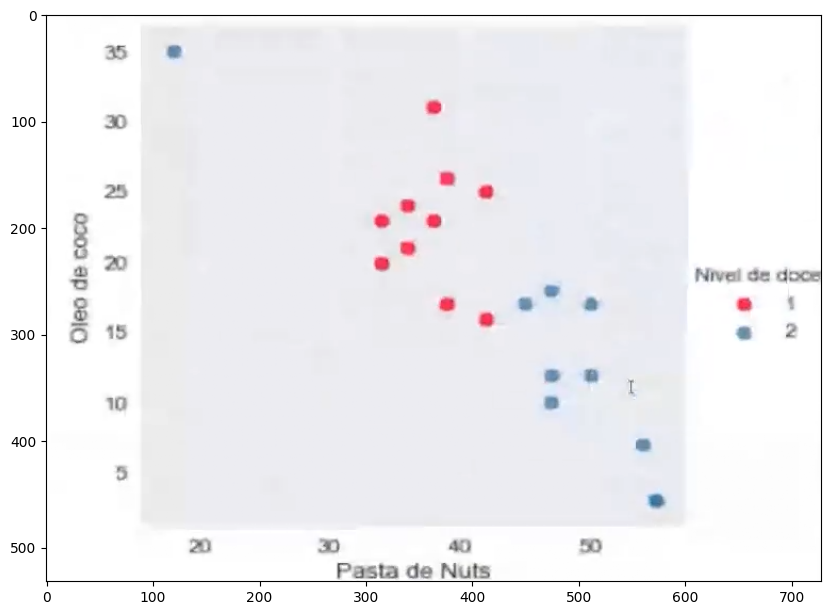

In [44]:
# http://web.microsoftstream.com/video/78d4414d-715d-459b-a02e-d0c149112cb
im = plt.imread('svm5.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


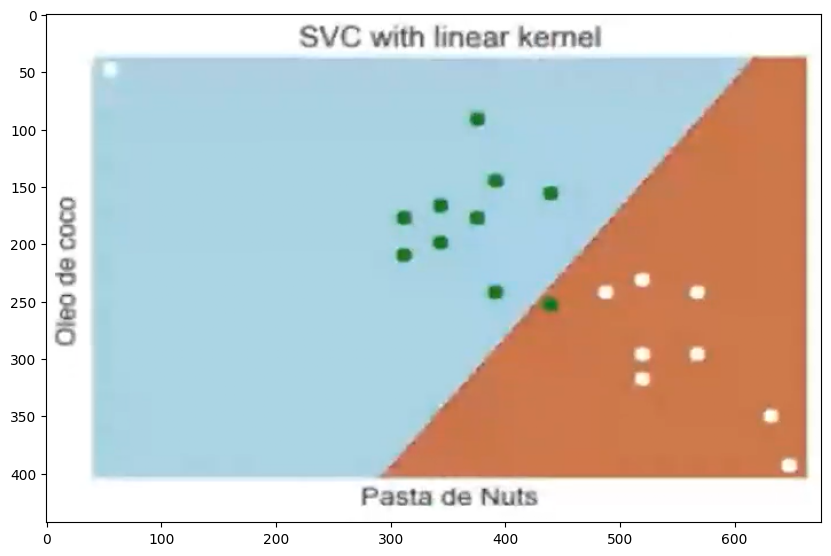

In [46]:
# https://web.microsoftstream.com/video/78d4414d-715d-4549-a82e-6ac469112bcb
im = plt.imread('SVM6.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


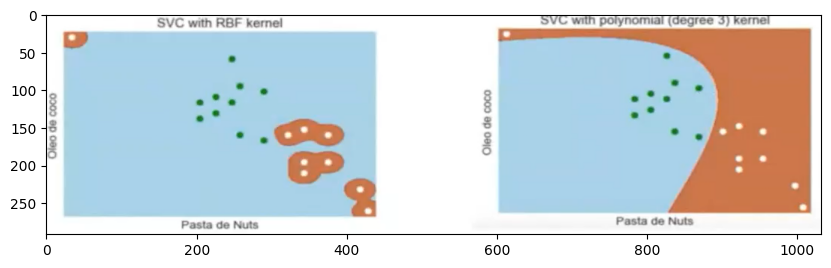

In [47]:
# http://web.microsoftstream.com/video/78d4414d-715d-459b-a82e-d0c149112bcb
im = plt.imread('SVM7.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


In [48]:
from sklearn.svm import SVC

In [49]:
# Criando e treinando o modelo SVM
modelo = SVC()
modelo.fit(X_train, y_train)

SVC()

In [50]:
# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(X_test)

In [51]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")


Acurácia: 1.0


# Redes Neurais Artificiais (RNA)

## Perceptron

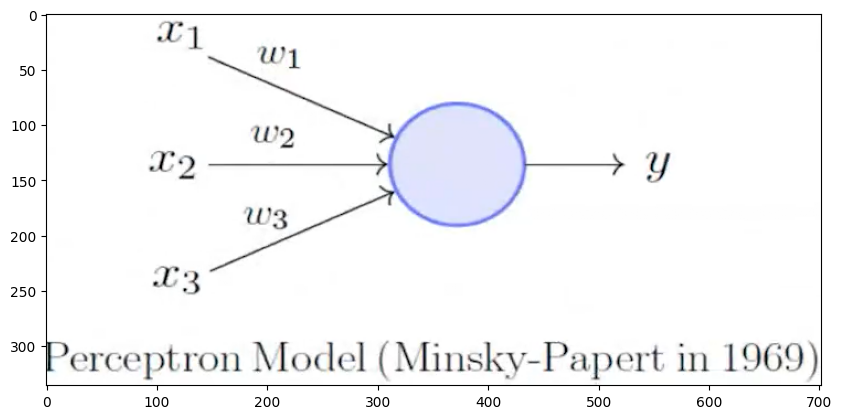

In [52]:
# https://mauro.dev/comecando-com-machine-learning-escrevendo-um-perceptron/
im = plt.imread('rna.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


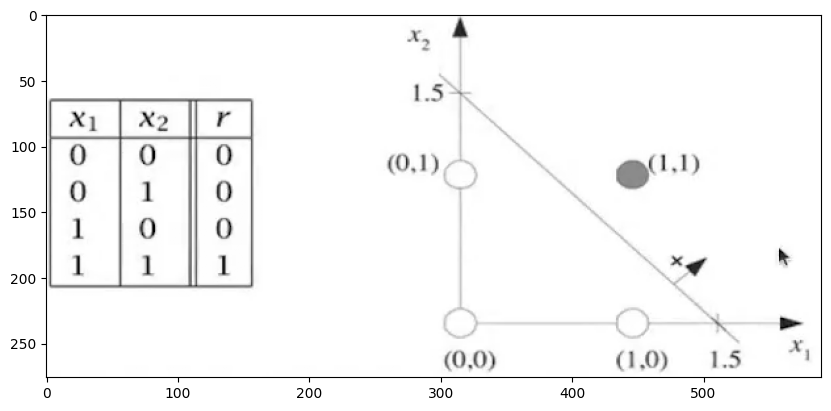

In [53]:
# AND Lógico
im = plt.imread('RNA2.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


In [54]:
from sklearn.linear_model import Perceptron

In [65]:
x = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [68]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
# Treinando o modelo Perceptron
modelo = Perceptron()
modelo.fit(X_train, y_train)


Perceptron()

In [71]:
# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(x_test)

In [72]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 0.7111111111111111


# Multilayer Perceptron (MLP)

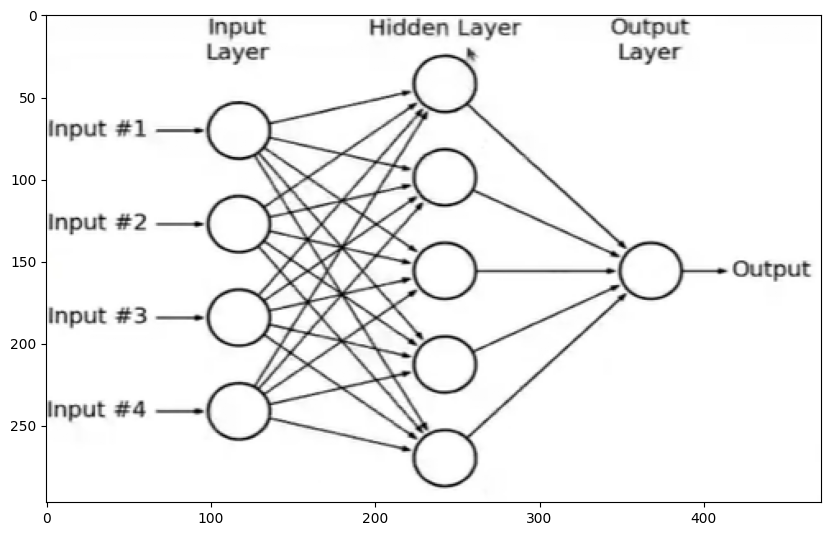

In [73]:
# http://www.newringtonhm.net/Figura/A-hypothetic-example-of-Multilayer-Perceptron-Network-Fig4
# O número de neurônios da camada intermediária (escondida) define a quantidade de hiperplanos separadores
im = plt.imread('RNA3.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


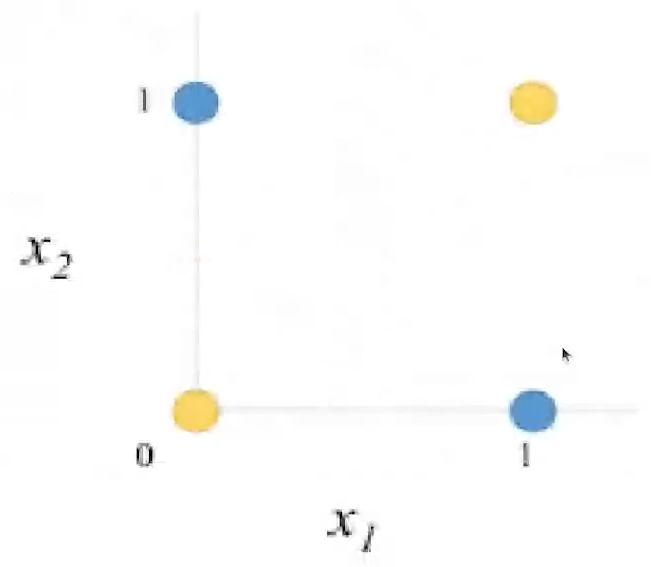

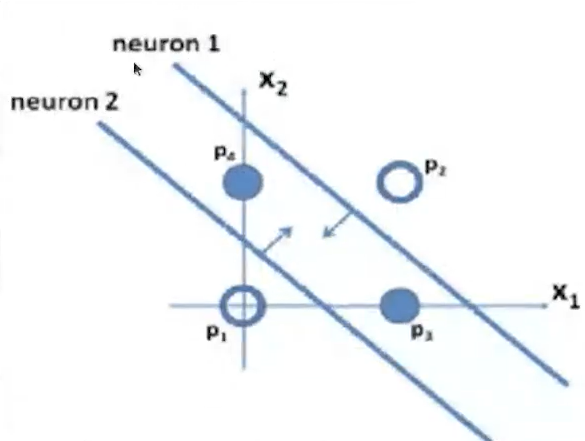

In [74]:
from sklearn.neural_network import MLPClassifier

In [75]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\vinic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [76]:
# Fazendo previsões sobre o conjunto de dados de teste
y_pred = mlp.predict(X_test)

In [77]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")


Acurácia: 0.7777777777777778
